<a href="https://colab.research.google.com/github/SquareRoot49/Pytorch_Learning/blob/main/Pytorch02_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Prepare the dataset for the classification data and get it ready.

In [ ]:
import sklearn
from sklearn.datasets import make_circles

In [ ]:
n_samples = 1000

X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [ ]:
X[: 5]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343]])

In [ ]:
y[: 5]

array([1, 1, 1, 1, 0])

In [ ]:
# make Dataframe of circles

In [ ]:
import pandas as pd

In [ ]:
circles = pd.DataFrame({'x1': X[:, 0],
                        'x2': X[:, 1],
                        'label': y})

In [ ]:
circles.head()

,x1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


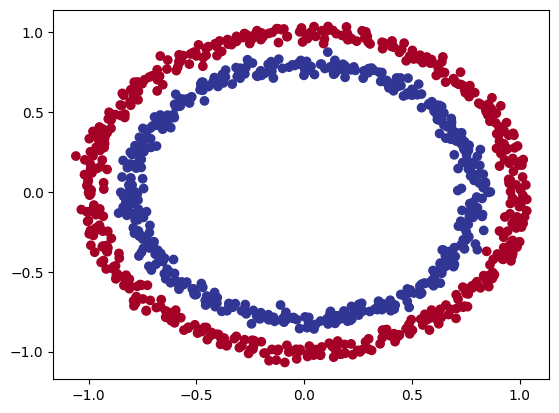

In [ ]:
plt.scatter(x = X[:, 0], y = X[:, 1], c = y, cmap = plt.cm.RdYlBu)

In [ ]:
# Split the data into train and test
# Aim: train the netural network model to seperate the bule dot and red dot

# 1.1 Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

# 1.2 Turn data into tensor

In [ ]:
torch.__version__

'2.5.1+cu121'

In [ ]:
X = torch.from_numpy(X).type(torch.float)

In [ ]:
type(X)

torch.Tensor

In [ ]:
y = torch.from_numpy(y).type(torch.float)

In [ ]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# Split data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape, y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

# 2. Build a model

In [ ]:
import torch
from torch import nn

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
class CircleModel0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 5)
    self.layer_2 = nn.Linear(in_features = 5, out_features = 1)
  def forward(self, x):
    return self.layer_2(self.layer_1(x))

In [ ]:
model_0 = CircleModel0().to(device)
model_0

CircleModel0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
# Replicate the model above using nn.sequential

In [ ]:
model_0 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features = 5, out_features = 1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3285,  0.2455],
                      [ 0.4757, -0.3664],
                      [-0.5220, -0.3333],
                      [ 0.4410, -0.3157],
                      [-0.0884, -0.3513]])),
             ('0.bias', tensor([-0.6850, -0.2736, -0.6056,  0.7066, -0.4978])),
             ('1.weight',
              tensor([[-0.1258,  0.2258, -0.3760, -0.1991, -0.0195]])),
             ('1.bias', tensor([0.0970]))])

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(untrained_preds[:10])
print(untrained_preds.shape)

tensor([[1.7652e-01],
        [3.0021e-01],
        [1.0514e-02],
        [2.2290e-01],
        [2.6172e-01],
        [3.3529e-01],
        [4.8448e-01],
        [4.9334e-01],
        [1.6677e-04],
        [3.1128e-01]])
torch.Size([200, 1])


In [ ]:
print(torch.round(untrained_preds[:5]))

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])


In [ ]:
# set up the loss function and optimizer
# for regression, you could use MAE or MSE
# but for class, you could use binary cross entropy

In [ ]:
# for optimizer, the most usually use is tha SGD and Adam, and for loss function we can use torch.nn.BCEWithLogitsLoss

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

In [ ]:
# Caculate accuarcy
def acc_fn(y_test, y_pred):
  correct = torch.eq(y_test, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [ ]:
# Building model

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [ ]:
epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()
  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  # Caculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = acc_fn(y_test = y_train, y_pred = y_preds)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)

    test_acc = acc_fn(y_test = y_test, y_pred = test_preds)

  # Print results
  if epoch % 10 == 0:
    print(f'Epoch: {epoch} | Loss: {loss} | Acc: {acc} | Test Loss: {test_loss} | Test Acc: {test_acc}')

Epoch: 0 | Loss: 0.701642632484436 | Acc: 58.5 | Test Loss: 0.7064709663391113 | Test Acc: 53.0
Epoch: 10 | Loss: 0.6957957744598389 | Acc: 52.37500000000001 | Test Loss: 0.700563907623291 | Test Acc: 48.0
Epoch: 20 | Loss: 0.6944035887718201 | Acc: 52.0 | Test Loss: 0.6988975405693054 | Test Acc: 47.5
Epoch: 30 | Loss: 0.6939938068389893 | Acc: 50.875 | Test Loss: 0.6982658505439758 | Test Acc: 48.5
Epoch: 40 | Loss: 0.6938128471374512 | Acc: 50.125 | Test Loss: 0.6979219913482666 | Test Acc: 47.5
Epoch: 50 | Loss: 0.6936954259872437 | Acc: 50.24999999999999 | Test Loss: 0.6976781487464905 | Test Acc: 48.0
Epoch: 60 | Loss: 0.6936033368110657 | Acc: 50.0 | Test Loss: 0.6974799633026123 | Test Acc: 49.0
Epoch: 70 | Loss: 0.6935263872146606 | Acc: 49.875 | Test Loss: 0.697308361530304 | Test Acc: 48.5
Epoch: 80 | Loss: 0.6934608221054077 | Acc: 50.625 | Test Loss: 0.6971554756164551 | Test Acc: 47.5
Epoch: 90 | Loss: 0.6934043169021606 | Acc: 50.375 | Test Loss: 0.6970167756080627 | Tes

In [ ]:
# Evaluate my model

In [ ]:
import requests
from pathlib import Path
import matplotlib.pyplot as plt
# Download helper function
if Path('helper_functions.py').is_file():
  print('File already exists')
else:
  print('Downloading file')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

In [ ]:
# plot decision boundary of the model

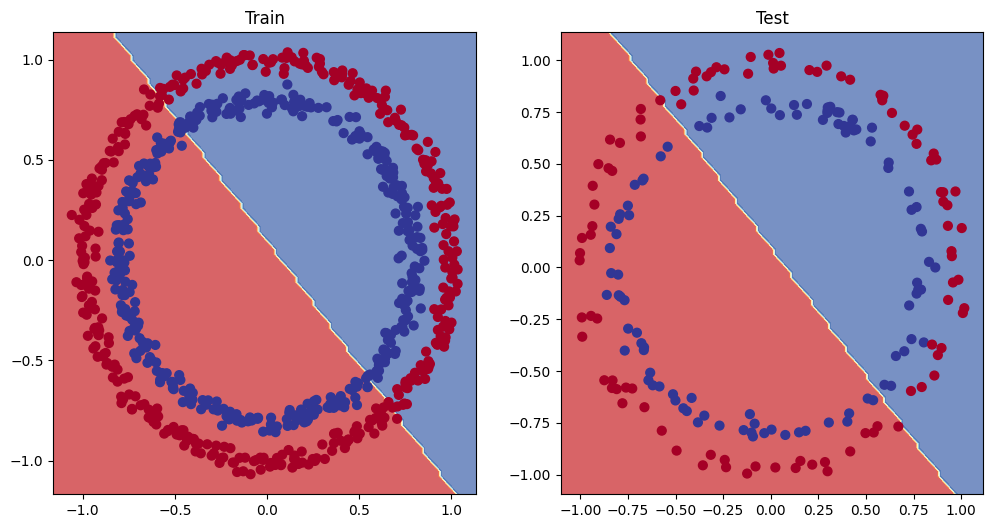

In [ ]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_0, X_test, y_test)

In [ ]:
# Improving a model

* Add more layers
* Add more hidden units
* Fit for longer
* Changing the activation function
* Change the learning rate
* Change the loss function

In [ ]:
class CircleModel1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x):
    #z = self.layer_1(x)
    #z = self.layer_2(z)
    #z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))



In [ ]:
  model_1 = CircleModel1().to(device)
  model_1

CircleModel1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create loss function
loss_fn = nn.BCEWithLogitsLoss()
# Create optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

Epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(Epochs):
  model_1.train()

  #1.forward fucntion
  y_logits = model_1(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  #2.Caculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = acc_fn(y_test = y_train, y_pred = y_preds)

  #3.Optimizer
  optimizer.zero_grad()

  #4.loss
  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(y_test = y_test, y_pred = test_preds)

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()


  # Print out results
  if epoch % 100 == 0:
    print(f'Epoch: {epoch} | Loss: {loss} | Acc: {acc} | Test Loss: {test_loss} | Test Acc: {test_acc}')

Epoch: 0 | Loss: 0.6939550638198853 | Acc: 50.875 | Test Loss: 0.6926106214523315 | Test Acc: 51.0
Epoch: 100 | Loss: 0.6936901807785034 | Acc: 50.24999999999999 | Test Loss: 0.6926934123039246 | Test Acc: 50.0
Epoch: 200 | Loss: 0.6935146450996399 | Acc: 50.125 | Test Loss: 0.6928169131278992 | Test Acc: 49.5
Epoch: 300 | Loss: 0.6933882236480713 | Acc: 50.5 | Test Loss: 0.6929519772529602 | Test Acc: 49.0
Epoch: 400 | Loss: 0.6932939291000366 | Acc: 50.375 | Test Loss: 0.6930880546569824 | Test Acc: 48.5
Epoch: 500 | Loss: 0.6932223439216614 | Acc: 49.875 | Test Loss: 0.6932206749916077 | Test Acc: 49.5
Epoch: 600 | Loss: 0.6931675672531128 | Acc: 49.5 | Test Loss: 0.6933473944664001 | Test Acc: 53.0
Epoch: 700 | Loss: 0.6931256055831909 | Acc: 49.375 | Test Loss: 0.6934669613838196 | Test Acc: 50.5
Epoch: 800 | Loss: 0.6930931806564331 | Acc: 50.0 | Test Loss: 0.6935786604881287 | Test Acc: 51.0
Epoch: 900 | Loss: 0.6930681467056274 | Acc: 50.625 | Test Loss: 0.6936821937561035 | Te

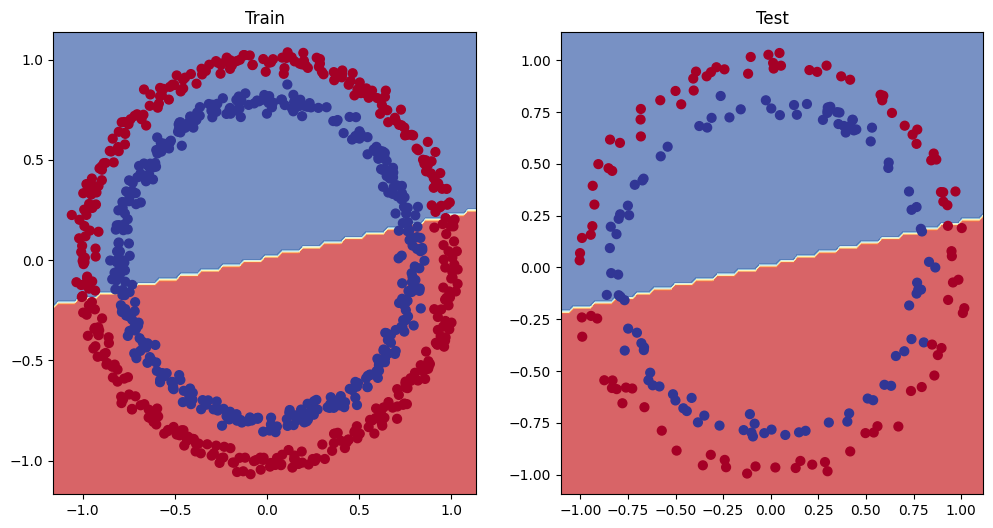

In [ ]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_1, X_test, y_test)

## Missing: Non-linearity

In [ ]:
from sklearn.datasets import make_circles


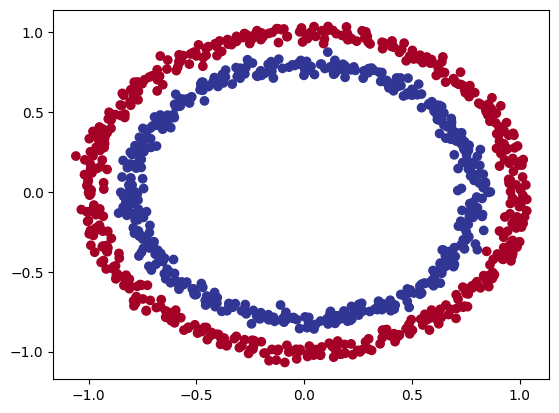

In [ ]:
n_samples = 1000
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

In [ ]:
import torch
from sklearn.model_selection import train_test_split
from torch import nn

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

## Non-linear model

In [ ]:
import torch
from torch import nn


In [ ]:
class CircleModel2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModel2().to(device)
model_3

CircleModel2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is a non-linear activation function

  def forward(self, x):
    # Where should we put our non-linear activation functions?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


In [ ]:
model_3 = CircleModel2().to(device)
model_3

CircleModel2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optiimizer = torch.optim.SGD(params = model_3.parameters(), lr = 00.1)

In [ ]:
len(X_train)

800

In [ ]:
def acc_fn(y_true, y_pred):
    correct = (y_true == y_pred).sum().item()
    return correct / len(y_true)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
  model_3.train()

  # forward
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #caculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = acc_fn(y_true = y_train, y_pred = y_pred)

  #zero
  optimizer.zero_grad()

  #loss backword
  loss.backward()

  #set
  optimizer.step()

  ## Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(y_true = y_test, y_pred = test_pred)

  if epoch % 100 ==0:
    print(f'Epoch: {epoch} | Loss: {loss} | Acc: {acc} | Test Loss: {test_loss} | Test Acc: {test_acc}')




Epoch: 0 | Loss: 0.6944094300270081 | Acc: 0.5 | Test Loss: 0.6937268972396851 | Test Acc: 0.5
Epoch: 100 | Loss: 0.6944094300270081 | Acc: 0.5 | Test Loss: 0.6937268972396851 | Test Acc: 0.5
Epoch: 200 | Loss: 0.6944094300270081 | Acc: 0.5 | Test Loss: 0.6937268972396851 | Test Acc: 0.5
Epoch: 300 | Loss: 0.6944094300270081 | Acc: 0.5 | Test Loss: 0.6937268972396851 | Test Acc: 0.5
Epoch: 400 | Loss: 0.6944094300270081 | Acc: 0.5 | Test Loss: 0.6937268972396851 | Test Acc: 0.5
Epoch: 500 | Loss: 0.6944094300270081 | Acc: 0.5 | Test Loss: 0.6937268972396851 | Test Acc: 0.5
Epoch: 600 | Loss: 0.6944094300270081 | Acc: 0.5 | Test Loss: 0.6937268972396851 | Test Acc: 0.5
Epoch: 700 | Loss: 0.6944094300270081 | Acc: 0.5 | Test Loss: 0.6937268972396851 | Test Acc: 0.5
Epoch: 800 | Loss: 0.6944094300270081 | Acc: 0.5 | Test Loss: 0.6937268972396851 | Test Acc: 0.5
Epoch: 900 | Loss: 0.6944094300270081 | Acc: 0.5 | Test Loss: 0.6937268972396851 | Test Acc: 0.5


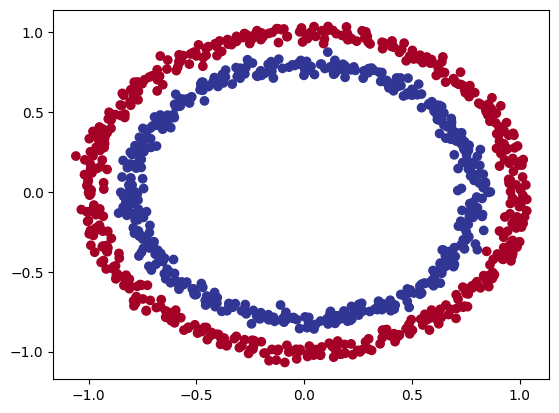

In [ ]:


# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:

# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [ ]:

# Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is a non-linear activation function

  def forward(self, x):
    # Where should we put our non-linear activation functions?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:


# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [ ]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data
epochs = 1000

for epoch in range(epochs):
  ### Training
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss (takes in logits as first input)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out what's this happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.6929, Acc: 50.00% | Test Loss: 0.6932, Test Acc: 50.00%
Epoch: 100 | Loss: 0.6912, Acc: 52.88% | Test Loss: 0.6910, Test Acc: 52.50%
Epoch: 200 | Loss: 0.6898, Acc: 53.37% | Test Loss: 0.6894, Test Acc: 55.00%
Epoch: 300 | Loss: 0.6879, Acc: 53.00% | Test Loss: 0.6872, Test Acc: 56.00%
Epoch: 400 | Loss: 0.6852, Acc: 52.75% | Test Loss: 0.6841, Test Acc: 56.50%
Epoch: 500 | Loss: 0.6810, Acc: 52.75% | Test Loss: 0.6794, Test Acc: 56.50%
Epoch: 600 | Loss: 0.6751, Acc: 54.50% | Test Loss: 0.6729, Test Acc: 56.00%
Epoch: 700 | Loss: 0.6666, Acc: 58.38% | Test Loss: 0.6632, Test Acc: 59.00%
Epoch: 800 | Loss: 0.6516, Acc: 64.00% | Test Loss: 0.6476, Test Acc: 67.50%
Epoch: 900 | Loss: 0.6236, Acc: 74.00% | Test Loss: 0.6215, Test Acc: 79.00%


In [ ]:
# Evaluating our model (visualizing)

In [ ]:
model_3.eval()
with torch.inference_mode():
  y_logits = model_3(X_test).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
y_test[:5], y_pred[:5]

(tensor([1., 0., 1., 0., 1.]), tensor([1., 0., 1., 0., 0.]))

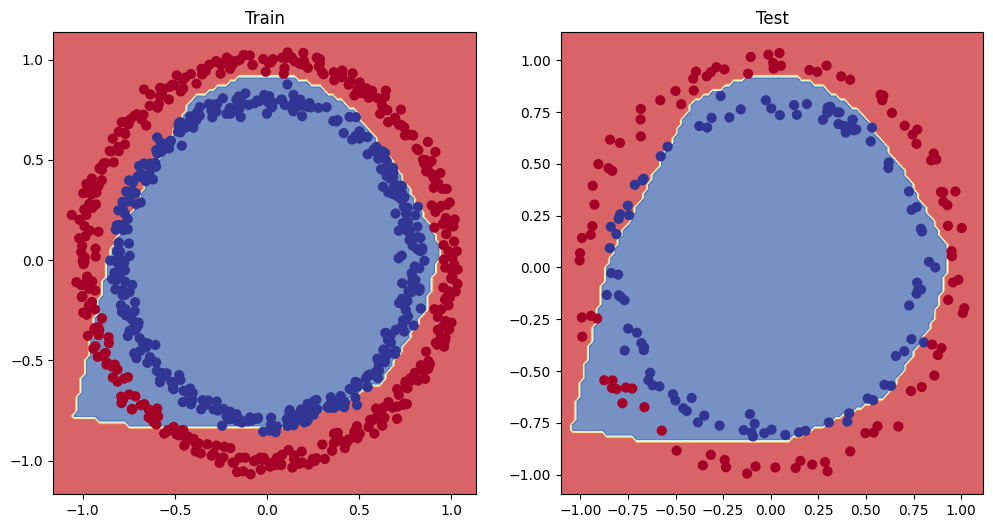

In [ ]:

plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_3, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_3, X_test, y_test)

## Replicate the non-linear model

In [ ]:
# Create a tensor
A = torch.arange(-10, 10, 1.0)
A.dtype

torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

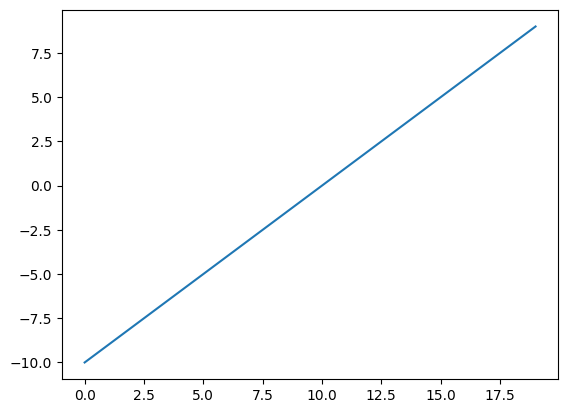

In [ ]:
plt.plot(A)

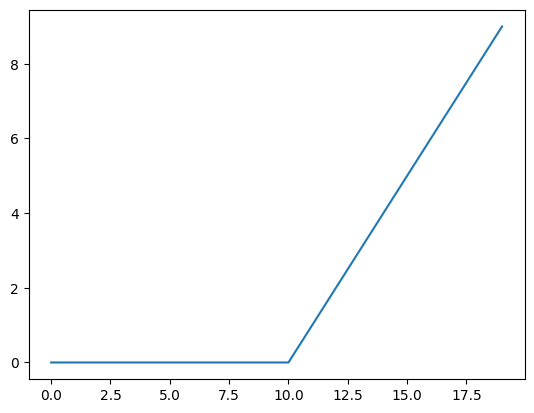

In [ ]:
plt.plot(torch.relu(A))

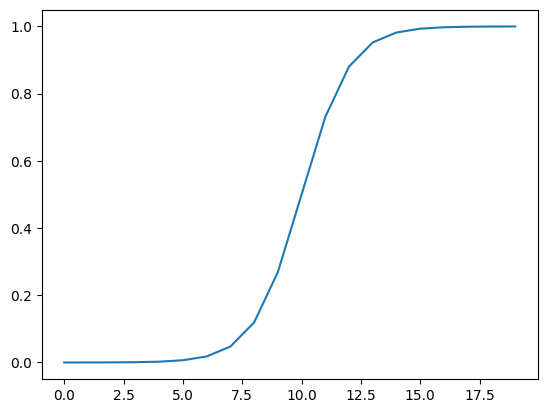

In [ ]:
plt.plot(torch.sigmoid(A))

In [ ]:
# Put it all together with multi-class classification

#8.1 Create a toy multi-class classification

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [ ]:
num_classes = 4
num_features = 2
random_seed = 42

X_blob, y_blob = make_blobs(n_samples = 1000,
                           n_features = num_features,
                           centers = num_classes,
                           cluster_std = 1.5,
                           random_state = random_seed)

# turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size = 0.2,
                                                                        random_state = random_seed)

In [ ]:
type(X_blob)

torch.Tensor

In [ ]:
type(X_blob_train)

torch.Tensor

In [ ]:
X_blob[0]

tensor([-8.4134,  6.9352])

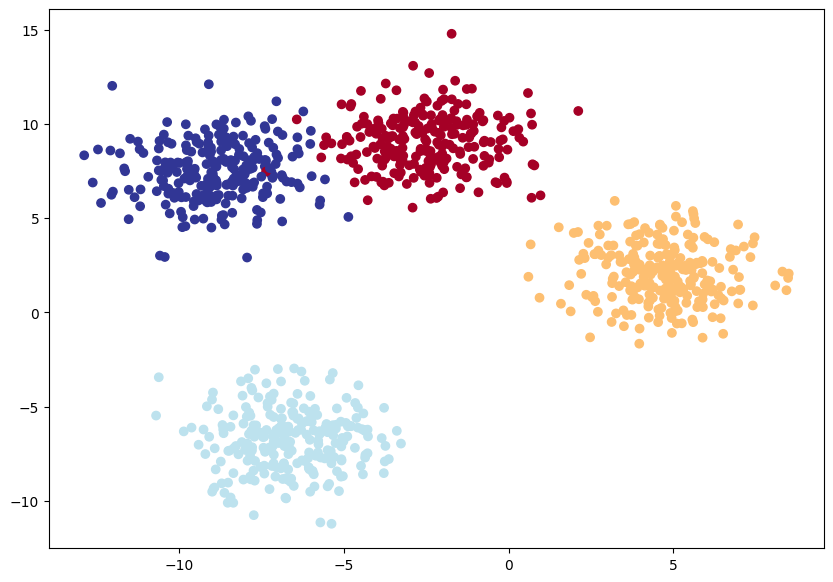

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c = y_blob, cmap = plt.cm.RdYlBu)


## Building multi-class classification model in pytorch

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 0):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        ##nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        ##nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_features)
        )
  def forward(self, x):
    return self.linear_layer_stack(x)


In [ ]:
model_4 = BlobModel(input_features = 2, output_features = 4, hidden_units = 8).to(device)

In [ ]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [ ]:
## Create a loss function and an optimizer for classification function

In [ ]:
loss_fn = nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.SGD(params = model_4.parameters(), lr = 0.1)

In [ ]:
# Getting prediction with a multi-class classification model(with a no-training model)

In [ ]:
model_4.eval()
with torch.inference_mode():
  y_preds = model_4(X_blob_test.to(device))
y_preds

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940],
        [ 0.4418, -1.3851,  0.3083,  1.2086],
        [-1.5169, -0.8383, -1.7723, -0.7571],
        [-0.2796, -1.6213, -0.5212,  0.8142],
        [ 0.0087, -1.6676, -0.2100,  1.0779],
        [-0.1146, -1.7781, -0.3619,  1.0633],
        [ 1.4046, -1.2270,  1.3925,  1.8533],
        [ 1.7991, -1.2295,  1.8271,  2.1682],
        [ 1.7553,  0.1992,  1.9850,  1.0572],
        [ 1.7293, -1.4932,  1.7121,  2.3114],
        [ 2.0059, -0.9975,  2.0886,  2.1575],
        [ 1.3878, -1.3971,  1.3495,  1.9682],
        [ 0.2662, -1.2199,  0.1385

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
y_preds[: 10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]])

In [ ]:
# Convert our model's logit outputs to prediction probabilities

In [ ]:
y_pred_probs = torch.softmax(y_preds, dim = 1)

y_pred_probs[:10]

tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951],
        [0.2788, 0.0088, 0.2893, 0.4232],
        [0.3246, 0.1261, 0.4545, 0.0948],
        [0.2229, 0.0443, 0.1867, 0.5461],
        [0.3447, 0.0368, 0.5269, 0.0917],
        [0.2145, 0.0510, 0.1752, 0.5593]])

In [ ]:
torch.sum(y_pred_probs[1])

tensor(1.)

In [ ]:
torch.argmax(y_pred_probs[1])

tensor(3)

In [ ]:
y_pred_probs[1][int(torch.argmax(y_pred_probs[1]))]

tensor(0.4147)

In [ ]:
# Convert the probability to labels

In [ ]:
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3])

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [ ]:
# Creat a training loop and test loop for classification model

In [ ]:
type(y_blob_train), y_blob_train.dtype

(torch.Tensor, torch.int64)

In [ ]:
loss_fn

CrossEntropyLoss()

In [ ]:
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 2000

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model_4.train()
  # forward popagation:
  y_logits = model_4(X_blob_train.to(device))
  y_pred = torch.softmax(y_logits, dim = 1).argmax(dim = 1)

  #caculate the loss
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true = y_blob_train, y_pred = y_pred)

  #zero grad
  optimizer.zero_grad()

  #
  loss.backward()

  optimizer.step()

  ## Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim = 1).argmax(dim = 1)
    test_loss = loss_fn(test_logits, y_blob_test) # Corrected variable name
    test_acc = accuracy_fn(y_true = y_blob_test, y_pred = test_pred) # Corrected variable name

  if epoch % 100 ==0:
    print(f'Epoch:{epoch}  | Loss:{loss:.4f} | Acc: {acc:.2f}  |  Test loss:{test_loss:.4f}  |  Test acc: {test_acc:.2f}')

Epoch:0  | Loss:1.0432 | Acc: 65.50  |  Test loss:0.5786  |  Test acc: 95.50
Epoch:100  | Loss:0.0318 | Acc: 99.12  |  Test loss:0.0229  |  Test acc: 99.50
Epoch:200  | Loss:0.0271 | Acc: 99.12  |  Test loss:0.0170  |  Test acc: 99.50
Epoch:300  | Loss:0.0256 | Acc: 99.25  |  Test loss:0.0150  |  Test acc: 99.50
Epoch:400  | Loss:0.0249 | Acc: 99.25  |  Test loss:0.0139  |  Test acc: 99.50
Epoch:500  | Loss:0.0244 | Acc: 99.25  |  Test loss:0.0132  |  Test acc: 99.50
Epoch:600  | Loss:0.0241 | Acc: 99.25  |  Test loss:0.0127  |  Test acc: 99.50
Epoch:700  | Loss:0.0238 | Acc: 99.25  |  Test loss:0.0122  |  Test acc: 99.50
Epoch:800  | Loss:0.0235 | Acc: 99.25  |  Test loss:0.0119  |  Test acc: 99.50
Epoch:900  | Loss:0.0232 | Acc: 99.25  |  Test loss:0.0116  |  Test acc: 99.50
Epoch:1000  | Loss:0.0230 | Acc: 99.38  |  Test loss:0.0113  |  Test acc: 99.50
Epoch:1100  | Loss:0.0228 | Acc: 99.38  |  Test loss:0.0111  |  Test acc: 99.50
Epoch:1200  | Loss:0.0226 | Acc: 99.38  |  Test loss

In [ ]:
## Making and evaluating pytorch multi-class model

In [ ]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)
y_logits[:10]

tensor([[  5.8907,  21.8741, -24.8028, -15.8268],
        [ 11.8078, -28.6163,   6.5873,  19.9443],
        [ -8.1249, -22.5277,  30.9300,  16.1841],
        [  1.7089,  17.7667, -15.4244, -12.7825],
        [ 14.4674,   2.9563, -22.3492,  -2.6072],
        [ 13.4968, -35.5989,   9.6541,  24.8662],
        [ -9.5110, -15.1703,  27.1227,  10.9866],
        [ 13.4046,  -5.2271, -14.3025,   3.2487],
        [ -7.0452, -34.2380,  38.6387,  24.4889],
        [ 13.5537,  -2.1309, -16.9766,   1.0404]])

In [ ]:
y_pred = torch.softmax(y_logits, dim = 1).argmax(dim = 1)

In [ ]:
y_pred[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
# Visualizing

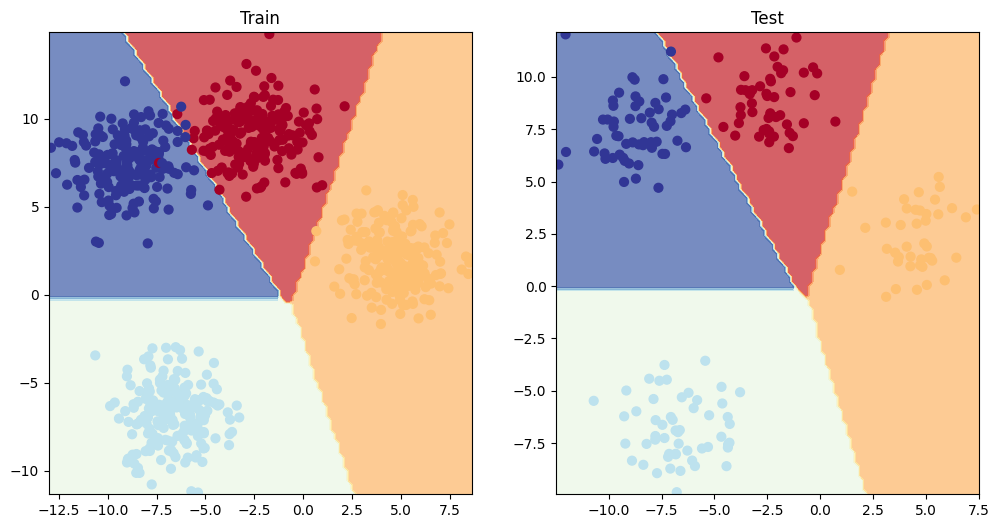

In [ ]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [ ]:
##

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 20.8 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy

In [ ]:
from torchmetrics import Accuracy

# Instantiate the Accuracy metric with the correct task type
torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

# Update the accuracy calculation with the predicted probabilities and target labels
torchmetric_accuracy.update(y_pred, y_blob_test)

# Compute and print the accuracy
accuracy = torchmetric_accuracy.compute()
print(f"Accuracy: {accuracy}")

Accuracy: 0.9950000047683716
